# Real Matching

A minimal, step-by-step walkthrough to perform image matching using our 'Stretcher' method.

Steps:
1) Pick parameters and the two images to be matched
2) Display images
3) Extract keypoints
4) Match without Stretcher for comparison
5) Apply Stretcher to adapt descriptors
6) Match with Stretcher

In [3]:
from src.notebook_utils import get_best_device, load_images, extract_superpoint_keypoints, matching, stretch_descriptions, stretched_matching

### 1) Pick parameters
Minimal parameters for reproducibility. Adjust paths and numbers as needed.


In [4]:
device = get_best_device()
print(f"Using device: {device}")

# Image paths
base_image_path = 'data/medical_deformed/pl_rest.png'
deformed_image_path = 'data/medical_deformed/pl_def3.png'

# Stretcher model
model_path = 'models/spstretcher_new.pth'

# Matcher selection: 'dsm' or 'lightglue'
matcher = 'lightglue'

# Number of keypoints to be extracted
num_keypoints = 2048 # 512 for DSM, 2048 for LightGlue


Using device: mps


### 2) Display images
Loading and quick visual check of the two images used for matching.


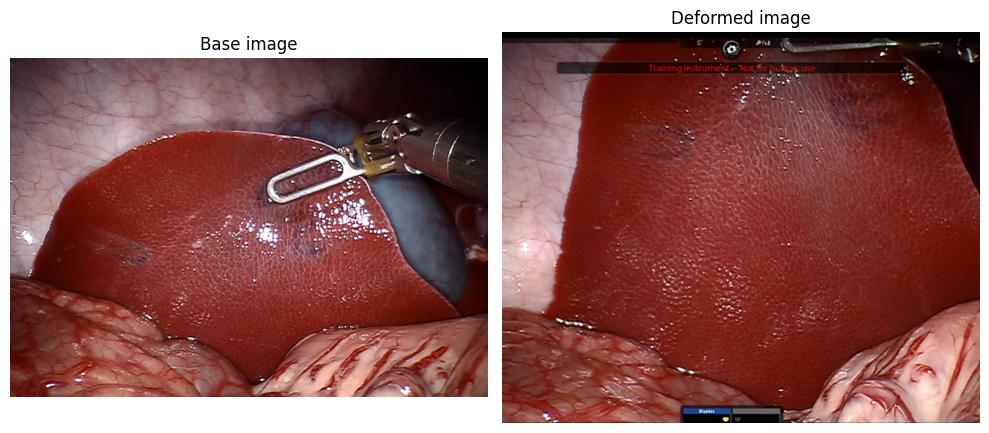

In [5]:
base_image, deformed_image = load_images(base_image_path, deformed_image_path)

### 3) Extract keypoints
Use SuperPoint to detect keypoints and compute descriptors; measure the extraction time.


In [6]:
base_features, deformed_features = extract_superpoint_keypoints(base_image_path, deformed_image_path, device, num_keypoints)

Description time: 4.178s


### 4) Normal Matching (for comparison)
Run either DSM or LightGlue depending on `matcher`.


Baseline LightGlue matching time: 2.092s


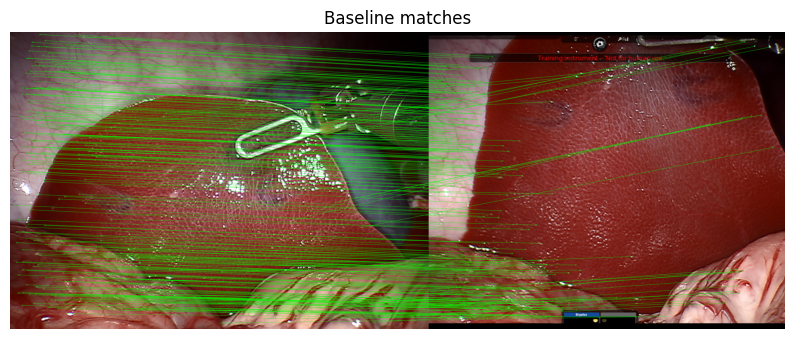

In [7]:
# Step 4: baseline matching via src function
matches_image, base_matches, deformed_matches = matching(
    matcher,
    base_features, deformed_features,
    base_image, deformed_image,
    device
)


### 5) Stretch descriptors
Apply the learned stretcher to adapt base descriptors under strain; this produces a tensor of stretched descriptors.


In [8]:
stretched_descriptions = stretch_descriptions(base_features, device, model_path)

Stretching time: 3.361s


### 6) Match using the Stretched Descriptions
Run either DSM or LightGlue adjusted to work with stretched descriptions.


Stretched LightGlue matching time: 319.348s


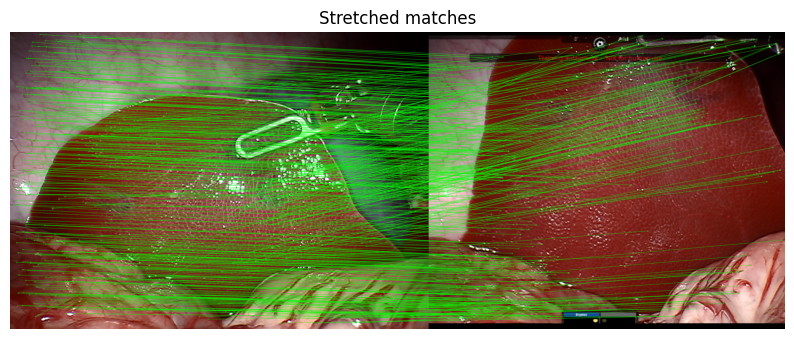

In [9]:
stretched_matches_image, stretched_base_matches, stretched_deformed_matches = stretched_matching(
    matcher,
    base_features, deformed_features,
    stretched_descriptions,
    base_image, deformed_image,
    device
)